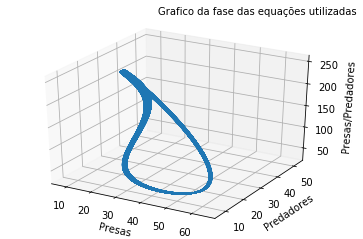

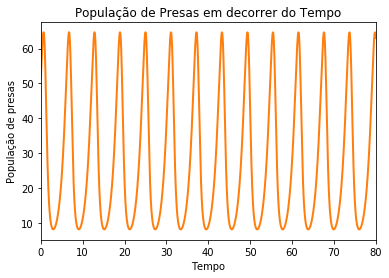

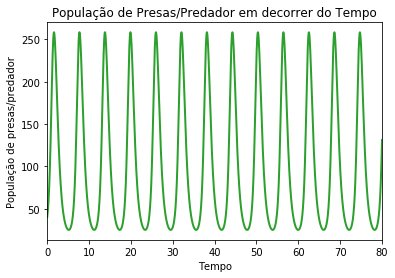

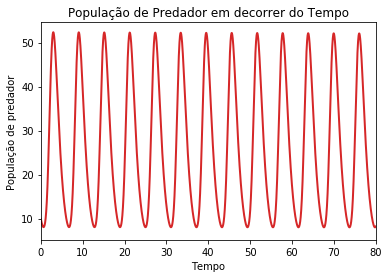

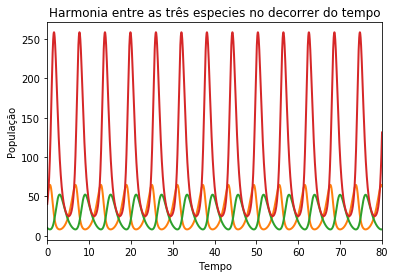

In [2]:
#==============================================================================
#                                 DESCRIÇÃO: 
#         Algoritmo presa x predador onde com a presença de 3 animais é 
#           utilizado o método de Runge-Kutta de 3° Ordem. Esse método tem o 
#         consumo em cadeia, onde a presa só é comida pela presa/predador e a 
#                       mesma só é comida pelo predador.
#==============================================================================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np

#Função proveniente das Presas (Consumidor primario)
def fX(x, y, z, a, b, sPP):
    return x * a - sPP * z * x 

#Função proveniente das Predador (Consumidor Terciario)
def fY(x, y, z, d, g):
    return  y * d * z - y * g

#Função proveniente das Presas/Predador (Consumidor Secundario)
def fZ(x, y, z, b, rPP, mPP):
    return z * rPP * x - z * mPP - b * y * z

#==============================================================================
#Valores das caracteristicas dos animais
#==============================================================================
a   = 0.9999        #Taxa de Reprodução das Presas

rPP = 0.0400        #Taxa de Reprodução da Presa/Predador
sPP = 0.0100        #Taxa de Sucesso da Presa/Predador
mPP = 0.9000        #Taxa de Mortalidade da Presa/Predados 

b   = 0.0080        #Taxa de Sucesso dos Predadores
d   = 0.0090        #Taxa de Reprodução dos Predadores
g   = 0.9000        #Taxa de Mortalidade dos Predadores

#==============================================================================
#Proporções dos animais
#==============================================================================
t0 = 0
x0 = 51       #Quantidade de Presas
y0 = 10       #Quantidade de Predador
z0 = 40       #Quantidade de Presa/Predador

t= t0
x = x0
y = y0
z = z0
#=============================================================================
#Tamanho do intervalo
#=============================================================================
h = 0.01
#=============================================================================

tempo = []
popX  = []
popY  = []
popZ  = []
i = 1
while (y > 0.0000001) and (x > 0.0000001) and (z > 0.0000001) and (i < 100000):
    #Utilizando o método de Runge-Kutta de 3 Ordem
    k11 = fX(x, y, z, a, b, sPP)
    k12 = fY(x, y, z, d, g)
    k13 = fZ(x, y, z, b, rPP, mPP)
    
    t = t + 0.5 * h
    
    k21 = fX(x + h * 0.5 * k11, y + h * 0.5 * k12, z + h * 0.5 * k13, a, b, sPP)
    k22 = fY(x + h * 0.5 * k11, y + h * 0.5 * k12, z + h * 0.5 * k13, d, g)
    k23 = fZ(x + h * 0.5 * k11, y + h * 0.5 * k12, z + h * 0.5 * k13, b, rPP, mPP)
    
    t = t + 0.5 * h
    
    k31 = fX(x + h * k21, y + h * k22, z + h * k23, a, b, sPP)
    k32 = fY(x + h * k21, y + h * k22, z + h * k23, d, g)
    k33 = fZ(x + h * k21, y + h * k22, z + h * k23, b, rPP, mPP)
    
    
    x = x + h * ( 0.25 * k11 + 0.50 * k21 + 0.25 * k31 )
    y = y + h * ( 0.25 * k12 + 0.50 * k22 + 0.25 * k32 )
    z = z + h * ( 0.25 * k13 + 0.50 * k23 + 0.25 * k33 )
    i = i + 1
    
    tempo.append(t)
    popX.append(x)
    popY.append(y)
    popZ.append(z)

#==============================================================================
#Representação em grafico 
#==============================================================================

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.text2D(0.45, 1, "Grafico da fase das equações utilizadas", transform=ax.transAxes)
ax.set_xlabel('Presas')
ax.set_ylabel('Predadores')
ax.set_zlabel('Presas/Predadores')
ax.plot(popX, popY, popZ)

fig = plt.figure()
plt.title("População de Presas em decorrer do Tempo")
plt.xlabel('Tempo')
plt.ylabel('População de presas')
plt.plot(tempo, popX,'C1', linewidth=2)
plt.xlim(0, 80)

fig = plt.figure()
plt.title("População de Presas/Predador em decorrer do Tempo")
plt.xlabel('Tempo')
plt.ylabel('População de presas/predador')
plt.plot(tempo, popZ,'C2', linewidth=2)
plt.xlim(0, 80)

fig = plt.figure()
plt.title("População de Predador em decorrer do Tempo")
plt.xlabel('Tempo')
plt.ylabel('População de predador')
plt.plot(tempo, popY,'C3', linewidth=2)
plt.xlim(0, 80)

fig = plt.figure()
plt.title("Harmonia entre as três especies no decorrer do tempo")
plt.xlabel('Tempo')
plt.ylabel('População')
plt.plot(tempo, popX,'C1', linewidth=2)
plt.plot(tempo, popY,'C2', linewidth=2)
plt.plot(tempo, popZ,'C3', linewidth=2)
plt.xlim(0, 80)
plt.show()